## Deriving Daily Precipitation from CWB Weather Station Records

In this notebook, we are going to prepare **daily precipitation** data from [Central Weather Beureau (CWB)](https://www.cwb.gov.tw/) weather station records.

First we need to define **daily precipitation**, because the CWB precipitation were recorded in hourly basis. The simplest way to define daily rainfall is to sum up the precipitation of each hour and to let missing records as 0.

Let's start with [a dataset](https://github.com/tingsyo/qpetw/blob/master/examples/01_explore_station_precipitation.ipynb) in our earlier study, which contains the hourly precipitation in 45 weather stations over Taipei basin.


### Read hourly precipitation data

In [1]:
# Load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_URL = "../data/t1hr.csv"

tmp = pd.read_csv(DATA_URL)
t1hr = tmp.iloc[:,1:]

t1hr_max = t1hr.max(axis=1)
t1hr_max.index=tmp['date']
print(t1hr_max.head())
print(t1hr_max.tail())
print('Hourly precipitation:')
print(np.percentile(t1hr_max,[0, 5, 10, 25, 50, 75, 90, 95]))


date
2013010101    0.0
2013010102    0.0
2013010103    0.0
2013010104    0.0
2013010105    0.0
dtype: float64
date
2016123120    0.5
2016123121    1.5
2016123122    1.5
2016123123    0.5
2016123124    1.0
dtype: float64
Hourly precipitation:
[ 0.   0.   0.   0.   0.   1.5  6.5 12. ]


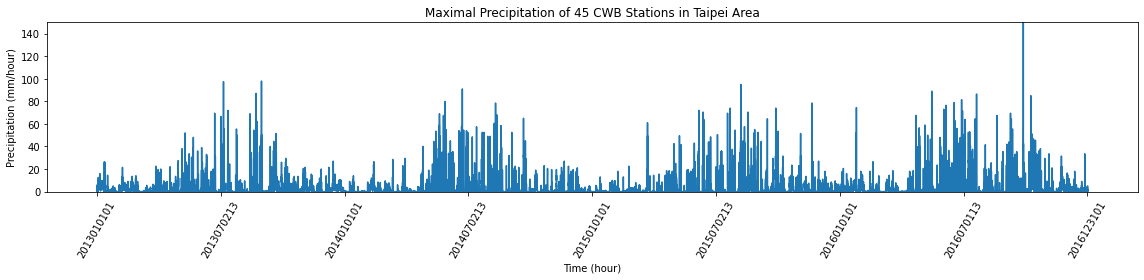

In [2]:
# Max of stations
t1hr_max = t1hr.max(axis=1)
plt.figure(figsize=(16,4))
plt.plot(t1hr_max)
plt.xticks(np.arange(0, len(t1hr_max), 4380), list(tmp['date'][np.arange(0, len(t1hr_max), 4380)]), rotation=60)
plt.ylim(0,150)
plt.xlabel('Time (hour)')
plt.ylabel('Precipitation (mm/hour)')
plt.title('Maximal Precipitation of 45 CWB Stations in Taipei Area')
plt.tight_layout()
plt.show()

### Convert hourly to daily precipitation

We will sum up the precipitation of hour-1 to hour-24 as the daily precipitation.

In [3]:
# Creating a list of date
yyyymmddhh = tmp['date']
print('Total hourly records: ' + str(yyyymmddhh.shape[0]))
#print(yyyymmddhh.iloc[0:10])
yyyymmdd = list(set((yyyymmddhh/100).astype(int)))
print('Total daily records: ' + str(len(yyyymmdd)))
print(yyyymmdd[:10])
yyyymmdd.sort()
print(yyyymmdd[:10])


Total hourly records: 35064
Total daily records: 1461
[20160512, 20160513, 20160514, 20160515, 20160516, 20160517, 20160518, 20160519, 20160520, 20160521]
[20130101, 20130102, 20130103, 20130104, 20130105, 20130106, 20130107, 20130108, 20130109, 20130110]


In [4]:
# Derive statistics every 24 rows
# Ref: https://stackoverflow.com/questions/47239332/take-the-sum-of-every-n-rows-in-a-pandas-series
N = 24
# Accumulative precipitation
acc_t24hr = t1hr.groupby(t1hr.index // N).sum()
acc_t24hr.index = yyyymmdd
print("Accumulative precipitation over 24 hours")
print(acc_t24hr.head())
print(acc_t24hr.shape)
# Maximal hourly precipitation
max_t24hr = t1hr.groupby(t1hr.index // N).max(numeric_only=True)
max_t24hr.index = yyyymmdd
print("Maximal hourly precipitation over 24 hours")
print(max_t24hr.head())
print(max_t24hr.shape)

Accumulative precipitation over 24 hours
          C0A580  C0A970  466940  C0A540  C0A550  C0A9A0  C0AC60  C0A870  \
20130101     6.0    44.5    21.5    12.0    18.5     5.5     8.5    15.5   
20130102     3.0     4.5     0.4     1.5    14.5     0.5     5.0    11.5   
20130103    27.0    15.5    36.3    14.0    83.0     4.5    20.5    76.5   
20130104     5.0    15.0    44.5    14.5    54.5     1.0     4.0    33.5   
20130105     3.5    51.0    78.0    13.5    48.5     0.5     3.0    25.0   

          466920  C0A520  ...  C0A9I1  C0AD50  C0A9B0  C0A560  C0A950  C0A940  \
20130101    10.5     9.5  ...     5.5     7.0     6.5     3.5    32.5    35.5   
20130102     1.0     4.5  ...     1.5     1.5     0.0     0.5     1.5     1.0   
20130103    15.5    17.0  ...     6.5    16.0     3.0    15.5     8.0    24.5   
20130104     4.5     4.5  ...     1.5     2.5     0.5     8.0    13.5    28.5   
20130105     2.0     4.0  ...     0.5     2.5     0.0     4.0    23.5    63.5   

          C0A57

In [7]:
acc_t24hr_max = acc_t24hr.max(axis=1)
print('Daily accumulative precipitation (max over 45 stations):')
print(np.percentile(acc_t24hr_max,[0, 5, 10, 25, 50, 75, 90, 95]))
print('Daily accumulative precipitation:')
print(np.percentile(acc_t24hr,[0, 5, 10, 25, 50, 75, 90, 95]))

print()
max_t24hr_max = max_t24hr.max(axis=1)
print('Daily maximal hourly precipitation (max over 45 stations):')
print(np.percentile(max_t24hr_max,[0, 5, 10, 25, 50, 75, 90, 95]))
print('Daily maximal hourly precipitation:')
print(np.nanpercentile(max_t24hr,[0, 5, 10, 25, 50, 75, 90, 95]))

Daily accumulative precipitation (max over 45 stations):
[  0.    0.    0.    1.   14.   47.5  90.  128. ]
Daily accumulative precipitation:
[ 0.   0.   0.   0.   0.   6.  24.  41.5]

Daily maximal hourly precipitation (max over 45 stations):
[ 0.   0.   0.   0.5  5.  16.  35.5 52.5]
Daily maximal hourly precipitation:
[ 0.   0.   0.   0.   0.   2.   7.5 13.5]


In [6]:
# Save to disk
acc_t24hr.to_csv('../data/t24hr_acc.csv')
max_t24hr.to_csv('../data/t24hr_max.csv')

So, the 95% percentile rank of daily precipitation is around 40 mm/day in Taipei Basin.


## Other weather events

Besides precipitation, we can also consider other weather events in TAD.

In [8]:
TAD_url='../data/1980-2019_weather_event_20210323_corSW_update.xlsx'

tad = pd.read_excel(TAD_url, engine='openpyxl')

print(tad.head())

   yyyymmdd  CS  TYW  TC100  TC200  TC300  TC500  TC1000  NWPTY  FT  NE  SNE  \
0  19800101   0  0.0      0      0      0      0       0      0   1   1    0   
1  19800102   0  0.0      0      0      0      0       0      0   0   0    0   
2  19800103   0  0.0      0      0      0      0       0      0   0   1    1   
3  19800104   0  0.0      0      0      0      0       0      0   1   1    1   
4  19800105   0  0.0      0      0      0      0       0      0   0   1    1   

   SWF  SSWF   DS  AQIN  AQIC  AQIS  week-synoptic  
0    0     0  9.0   9.0   9.0   9.0            0.0  
1    0     0  9.0   9.0   9.0   9.0            1.0  
2    0     0  9.0   9.0   9.0   9.0            0.0  
3    0     0  9.0   9.0   9.0   9.0            0.0  
4    0     0  9.0   9.0   9.0   9.0            0.0  


### Selected Weather Events

- **CS**: 寒潮，台北測站24小時內有任一小時10度C以下
- **TYW**: 中央氣象局發布颱風警報
- **NWPTC**: 西北太平洋地區有熱帶氣旋
- **FT**: 中央氣象局地面天氣圖，2000年以後以00Z代表
- **NE**: 彭佳嶼測站日平均風向為東北風(15-75度)及風速達4m/s
- **SWF**: CFSR 850hPa 紅色區域內 u平均>0並且v平均>0並且平均風達3m/s 或者 >6m/s的風速範圍站紅色區域30%

In [12]:
tad['yyyymmdd'].dtype

dtype('int64')

In [21]:
start_date = 20130101
end_date = 20161231

selected_col = ['CS', 'TYW', 'NWPTY', 'FT', 'NE', 'SWF']

date_filter = (tad['yyyymmdd']>=start_date) & (tad['yyyymmdd']<=end_date)

tad_filtered = tad.loc[date_filter, selected_col].reset_index(drop=True)
tad_filtered.index = list(tad['yyyymmdd'].loc[date_filter])

print(tad_filtered.shape)
print(tad_filtered.head())

(1461, 6)
          CS  TYW  NWPTY  FT  NE  SWF
20130101   0  0.0      1   0   0    0
20130102   0  0.0      1   0   1    0
20130103   0  0.0      1   0   1    0
20130104   0  0.0      1   0   1    0
20130105   0  0.0      1   0   1    0


In [22]:
tad_filtered.to_csv('../data/tad_filtered.csv')